<a rel="license" href="https://faculdadesalvadorarena.org.br/"><img alt="FESA" style="border-width:0" src="https://faculdadesalvadorarena.org.br/wp-content/uploads/2022/07/logo_fesa.png" /></a><br />
**FESA - Eletiva II (2025.1)** <br/>

Aluno(a): Gabriel Damazio <br/>
Aluno(a): Wendell Moreira Guindani <br/>
Aluno(a): Guilherme Augusto <br/>
Aluno(a): Igor Pierote <br/>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
dfratings = pd.read_csv('/content/ratings.csv')

In [6]:
dflinks = pd.read_csv('/content/links.csv')
dfmovies = pd.read_csv('/content/movies.csv')
dfratings = pd.read_csv('/content/ratings.csv')
dftags = pd.read_csv('/content/tags.csv')

# Exercicio 1

## A)

Extraindo o ano do filme através do titulo

In [7]:
def extract_year(title):
    if "(" in title and ")" in title[-6:]:
        year_str = title.strip()[-5:-1]
        if year_str.isdigit():
            return int(year_str)
    return None

dfmovies["year"] = dfmovies["title"].apply(extract_year)

Fazendo os calculos para gerar uma corelação

In [8]:
# Média de avaliações por filme
avg_ratings = dfratings.groupby("movieId")["rating"].mean().reset_index()
avg_ratings.rename(columns={"rating": "avg_rating"}, inplace=True)

# Juntar com dados dos filmes
movies_with_ratings = pd.merge(dfmovies, avg_ratings, on="movieId")

# Remover filmes sem ano
movies_with_ratings = movies_with_ratings.dropna(subset=["year"])

# Calcular a correlação
correlation = movies_with_ratings["year"].corr(movies_with_ratings["avg_rating"])
print(f"Correlação entre ano e avaliação média: {correlation:.2f}")

Correlação entre ano e avaliação média: -0.11


A correlação entre o ano de lançamento do filme e sua avaliação média é aproximadamente -0.11.

Isso indica uma correlação negativa fraca — ou seja, filmes mais antigos tendem a ter avaliações um pouco mais altas, mas essa tendência é muito fraca e pode não ser significativa.

# C)

Coletando as informações do filme

In [9]:
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   title    9742 non-null   object 
 2   genres   9742 non-null   object 
 3   year     9730 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 304.6+ KB


Separando os gêneros em linhas individuais

In [10]:
generos_explodidos = dfmovies['genres'].str.split('|').explode()

Contando as ocorrências de cada gênero

In [11]:
contagem_generos = generos_explodidos.value_counts()

Extraindo o gênero mais frequente

In [13]:
genero_mais_frequente = contagem_generos.idxmax()
quantidade = contagem_generos.max()
print(f"Gênero mais frequente: {genero_mais_frequente} (aparece {quantidade} vezes)")

Gênero mais frequente: Drama (aparece 4361 vezes)


Acrescentando um gráfico

<ipython-input-14-bdd310875cfe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_generos.values[:10], y=contagem_generos.index[:10], palette='coolwarm')


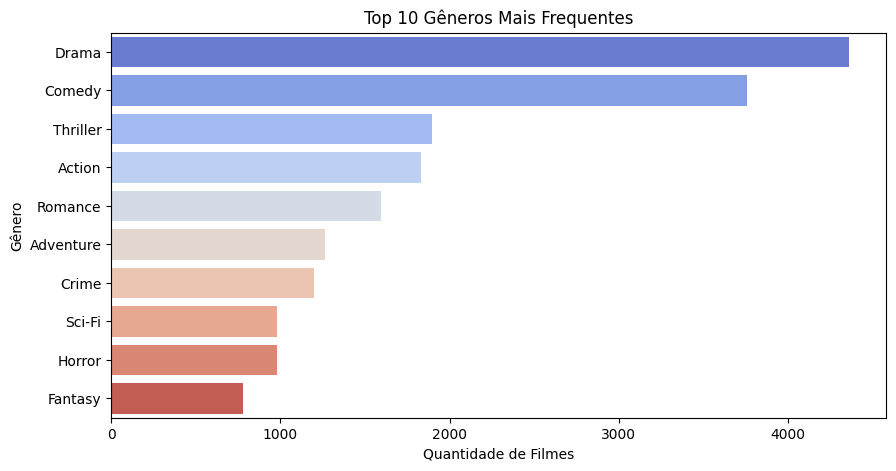

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x=contagem_generos.values[:10], y=contagem_generos.index[:10], palette='coolwarm')
plt.title('Top 10 Gêneros Mais Frequentes')
plt.xlabel('Quantidade de Filmes')
plt.ylabel('Gênero')
plt.show()

# D)

In [ ]:
#Aqui vamos entender a base de dados aferindo as informações presente nela
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [ ]:
#Vizualizando as primeiras linhas da base de dados e convertendo a data de timestamp para datetime
dfratings['timestamp'] = pd.to_datetime(dfratings['timestamp'], unit='s')
dfratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,2000-07-30 18:45:03
1,1,3,4.0,2000-07-30 18:20:47
2,1,6,4.0,2000-07-30 18:37:04
3,1,47,5.0,2000-07-30 19:03:35
4,1,50,5.0,2000-07-30 18:48:51


In [ ]:
#Aqui extraimos o ano de cada uma das avaliações e criamos uma coluna especifica para isso
dfratings['ano'] = dfratings['timestamp'].dt.year
dfratings.head()

,userId,movieId,rating,timestamp,ano
0,1,1,4.0,2000-07-30 18:45:03,2000
1,1,3,4.0,2000-07-30 18:20:47,2000
2,1,6,4.0,2000-07-30 18:37:04,2000
3,1,47,5.0,2000-07-30 19:03:35,2000
4,1,50,5.0,2000-07-30 18:48:51,2000


In [ ]:
#Verificando os anos que estão dentro do escopo de analise
valores_unicos = dfratings['ano'].unique()
print(valores_unicos)

[2000 2015 2011 2001 1999 1996 2005 2006 2007 2003 2016 1998 2009 2017
 2013 2012 2018 2014 2010 1997 2004 2002 2008]


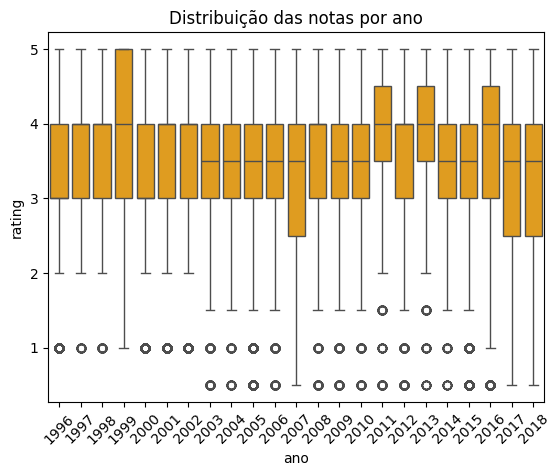

In [ ]:
#Aqui usamos um gráfico boxplot para demonstrar como as notas está distribuidas ao longo dos anos
sns.boxplot(data=df, x='ano', y='rating', color='orange')
plt.title('Distribuição das notas por ano')
plt.xticks(rotation=45)
plt.show()

Acima é possível observar um gráfico que demonstra a distribuição das notas ao longo dos anos

# Questão 2


## Perguntas sobre a base de dados 'ratings'

### 1) Qual ano possui a maior média de notas da base de dados?

In [ ]:
df_media = dfratings.groupby('ano')['rating'].mean().reset_index()

In [ ]:
df_media.head(199).sort_values('rating',ascending=False)

,ano,rating
17,2013,3.877404
15,2011,3.784024
3,1999,3.772448
1,1997,3.727557
20,2016,3.686334
12,2008,3.656746
16,2012,3.641323
6,2002,3.606958
0,1996,3.535927
19,2015,3.513830


In [ ]:
df_media.nlargest(1, 'rating')[['ano', 'rating']]

,ano,rating
17,2013,3.877404


Logo o ano com a maior média de anos foi 2013, com a média 3.877404

### 2) Qual ano ocorreu o maior numero de avaliações?

In [ ]:
dfratings.describe()

,userId,movieId,rating,timestamp,ano
count,100836.000000,100836.000000,100836.000000,100836,100836.000000
mean,326.127564,19435.295718,3.501557,2008-03-19 17:01:27.368469248,2007.722936
min,1.000000,1.000000,0.500000,1996-03-29 18:36:55,1996.000000
25%,177.000000,1199.000000,3.000000,2002-04-18 09:57:46,2002.000000
50%,325.000000,2991.000000,3.500000,2007-08-02 20:31:02,2007.000000
75%,477.000000,8122.000000,4.000000,2015-07-04 07:15:44.500000,2015.000000
max,610.000000,193609.000000,5.000000,2018-09-24 14:27:30,2018.000000
std,182.618491,35530.987199,1.042529,NaN,6.890376


In [ ]:
contagem_por_ano = dfratings.groupby('ano').size().reset_index(name='total_avaliacoes')
contagem_por_ano.nlargest(1, 'total_avaliacoes')[['ano', 'total_avaliacoes']]

,ano,total_avaliacoes
4,2000,10061


In [ ]:
contagem_por_ano.head(199).sort_values('total_avaliacoes',ascending=False)

,ano,total_avaliacoes
4,2000,10061
21,2017,8198
11,2007,7114
20,2016,6703
19,2015,6616
22,2018,6418
0,1996,6040
9,2005,5813
16,2012,4656
12,2008,4351


Logo o maior numero de avaliações ocorreu no ano 2000, sendo que foram feitas 10061 avaliações esse ano.

## Perguntas sobre a base de dados 'links'

### 1) Nessa banco de dados, há algum filme que não contenha uma avaliação em algum site de avaliações?

In [ ]:
# Verificar quais colunas têm dados faltando (NaN)
missing_data = dflinks.isna().sum()

# Filtrar apenas as colunas que possuem valores faltando
columns_with_na = missing_data[missing_data > 0]

columns_with_na

,0
tmdbId,8


Sim, existem dados faltantes na coluna tmdbId

### 2)Quais são os dados faltantes e de qual coluna eles pertencem?

In [ ]:
# Obter os IDs dos registros que têm dados faltando
rows_with_na = dflinks[dflinks.isna().any(axis=1)]

columns_with_na, rows_with_na["movieId"].tolist()


(tmdbId    8
 dtype: int64,
 [791, 1107, 2851, 4051, 26587, 32600, 40697, 79299])

Os filmes com ID 791, 1107, 2851, 4051, 26587, 32600, 40697, 79299, não possuem tmbdid.

## Perguntas sobre a base de dados 'movies'

###1)Qual o filme mais antigo do catálogo?

Removendo filme sem ano registrado

In [15]:
df_com_ano = dfmovies.dropna(subset=['year'])

Encontrar o menor ano

In [16]:
ano_mais_antigo = df_com_ano['year'].min()

Filtrar filmes que possuam esse ano

In [17]:
filmes_mais_antigos = df_com_ano[df_com_ano['year'] == ano_mais_antigo]

Mostrando os filmes

In [18]:
print(f"Filme(s) mais antigo(s) do catálogo ({int(ano_mais_antigo)}):")
print(filmes_mais_antigos[['title', 'year']])

Filme(s) mais antigo(s) do catálogo (1902):
                                                  title    year
5868  Trip to the Moon, A (Voyage dans la lune, Le) ...  1902.0


###2)Qual o título mais extenso?

Contando os caracteres de cada título

In [19]:
dfmovies['title_length'] = dfmovies['title'].str.len()

Encontrando o mais longo

In [20]:
titulo_mais_extenso = dfmovies.loc[dfmovies['title_length'].idxmax()]

Exibindo o título de maior comprimento

In [21]:
print(f"Título mais extenso ({titulo_mais_extenso['title_length']} caracteres):")
print(titulo_mais_extenso['title'])

Título mais extenso (158 caracteres):
Dragon Ball Z the Movie: The World's Strongest (a.k.a. Dragon Ball Z: The Strongest Guy in The World) (Doragon bôru Z: Kono yo de ichiban tsuyoi yatsu) (1990)
